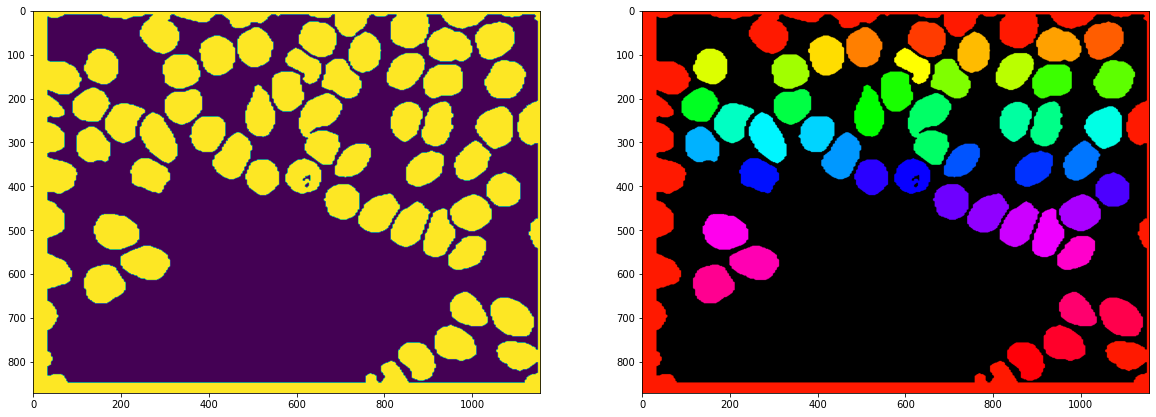

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('connected2.png',0)

img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]


num_labels, labels = cv2.connectedComponents(img,connectivity=4)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
plt.show()

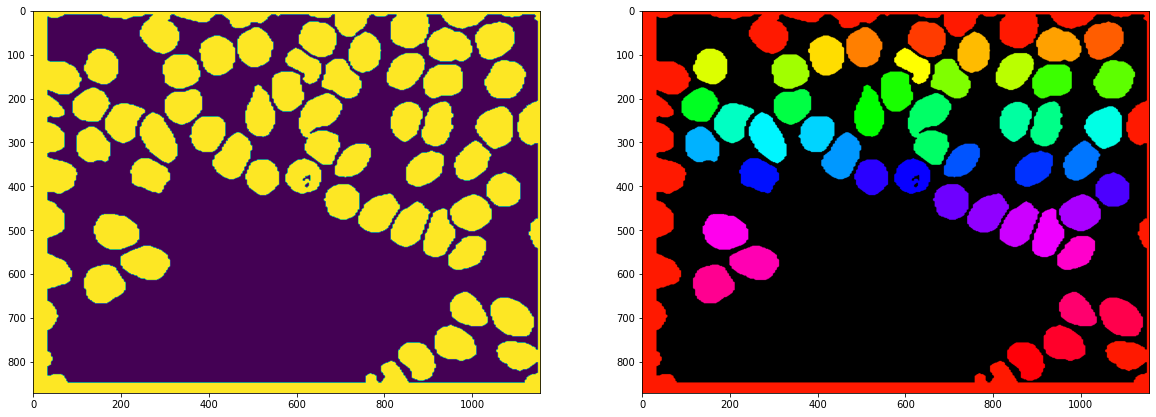

In [12]:


img = cv2.imread('connected2.png',0)

img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

output = cv2.connectedComponentsWithStats(image=img, connectivity=4, ltype=cv2.CV_16U )
(numLabels, labels, stats, centroids) = output

if (np.max(labels) == 0):
    divider = 1
else:
    divider = np.max(labels)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/divider)
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

labeled_img_rgb = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)
#return labeled_img_rgb, numLabels, labels, stats, centroids

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(labeled_img_rgb)
plt.show()